<h1 align="center"><b><strong> &nbsp  IT Project 1</strong></b></h1> 

<h2 align="center"><b>Authors: <br> Antona Antonio <br>Nappi Andrea<br>Nguyễn Thi Kim Hong <br>  Rea Leonardo</b></h2> 

<h2 align="center"> Task description </h2> 

The task in this coursework is implementing the code for pricing a call option on a portfolio of stocks via Monte Carlo Method.<br>
The prices of the two stocks can be described with the following model under the risk-neutral measure:<br><br>
<font size="3"><em>dS<sub>t,1</sub> = S<sub>t,1</sub> * r * dt + S<sub>t,1</sub> * &sigma;<sub>1</sub> * (1 + sin(4t)) * dW<sub>t,2</sub></em>;<br>
<em>dS<sub>t,2</sub> = S<sub>t,2</sub> * r * dt + S<sub>t,2</sub> * &sigma;<sub>2</sub> * (&rho;*dW<sub>t,1</sub> + √(1 - &rho;<sup>2</sup>) * dW<sub>t,2</sub>)</em>;</font> <br><br>
where W1 and W2 are two independent Wiener processes, r is the risk-free interest rate, ρ∈[-1,1] is the correlation coeﬃcient, σ1 and σ2 are the volatility components of the ﬁrst and second stock, respectively.<br>
The payoﬀ of the call option on a portfolio of stocks in this model is given by: <br><br>
<font size="3"><em> (α * S<sub>T,1</sub> +(1−α) * S<sub>T,2</sub>) − K) <sup>+</sup> </em> </font> <br><br>
where α ∈ [0,1] is the portfolio composition, T is the period time, K is the strike price.

<h3 align="center"> Financial problem </h3> 


Options are a form of derivative financial instrument in which two parties contractually agree to transact an asset at a specified price before a future date. An option gives its owner the right to either buy or sell an asset at the exercise price but the owner is not obligated to exercise (buy or sell) the option.<br><br>
A European option is a version of an options contract that limits execution to its expiration date. In other words, if the underlying security such as a stock has moved in price, an investor would not be able to exercise the option early and take delivery of or sell the shares. Instead, the call or put action will only take place on the date of option maturity.<br><br>
Another version of the options contract is the American option, which can be exercised any time up to and including the date of expiration. The names of these two versions should not be confused with the geographic location as the name only signifies the right of execution.<br><br>
European options define the timeframe when holders of an options contract may exercise their contract rights. The rights for the option holder include buying the underlying asset or selling the underlying asset at the specified contract price—the strike price. With European options, the holder may only exercise their rights on the day of expiration. As with other versions of options contracts, European options come at an upfront cost—the premium

<h3 align="center">Mathematical problem </h3>

The Euler-Maruyama scheme is used for the solution of the stochastic diﬀerential equations describing the dynamic of stock prices. The idea behind this scheme is that ﬁrst the time interval [0,T] is partitioned into n equal subintervals of width dt. 
Thus, <em>t,j=j<sub>dt</sub></em> where j=0,...,n.<br>
Then, if we denote by <em>S<sub>j,1</sub></em> and <em>S<sub>j,2</sub></em> the approximations of <em>S<sub>t,j,1</sub></em>=<em>S<sub>j<sub>dt</sub>,1</sub></em> and <em>S<sub>j,2</sub></em>=<em>S<sub>j<sub>dt</sub>,2</sub></em> respectively, the scheme of the above SDEs for the two stock prices would have the form:<br><br>
<font size="3"><em>S<sub>j+1,1</sub> =S<sub>j,1</sub> + S<sub>j,1</sub> * r * dt + S<sub>j,1</sub> * &sigma;<sub>1</sub> * (1 + sin(4t)) * dW<sub>j,1</sub></em>;<br>
<em>S<sub>j+1,1</sub> =S<sub>j,2</sub> + S<sub>j,2</sub> * r * dt + S<sub>j,2</sub> * &sigma;<sub>2</sub>(&rho; * dW<sub>j,1</sub> + √(1 - &rho;<sup>2</sup>) * dW<sub>j,2</sub>)</em>;</font> <br><br>
Using Monte Carlo, this process is sumulated M times an thus the price of the option would be the sample mean. <br>
The precision of this computed price is reflected in the confidence intervals.

<h2 align="center">Script </h2>

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Define function to compute an Euler approximation and the exact solution at time T
def Euler_trajectory (X_0, a, b, c, d, func_dummies, sigma, r, T, N, dw1=None, dw2=None, rho=1):
    
    if all(item in [0,1] for item in func_dummies)==False or len(func_dummies) != 4:
        raise ValueError('The "func_dummies" argument should consist of a list of length 4 filled with binary values')
        
    if any(n<0 for n in [sigma, r, T, N])==True or abs(rho)>1 or abs(rho)<0:
        raise ValueError('Impossible value for at least one parameter')
    
    dt = T/N

    # Implement the Euler scheme
    X = np.zeros (N+1)
    X[0] = X_0
    
    # Compute increment of Brownian motion
    if dw1 is None:
        dW1 = np.random.normal(scale=math.sqrt(dt), size=N)
    else:
        dW1 = dw1
    #print(dW)
    if dw2 is None:
        dW2 = np.random.normal(scale=math.sqrt(dt), size=N)
    else:
        dW2 = dw2

    #print(dW1)
    for i in range(N):
        X[i+1] = X[i] + a(X[i],r, dt) * func_dummies[0] + b(X[i], i, sigma) * dW1[i] * func_dummies[1] + \
            c(X[i], rho, sigma) * dW1[i] * func_dummies[2] + d(X[i], rho, sigma) * dW2[i] * func_dummies[3]
     
    return X 

In [3]:
# Define function to compute an Euler approximation and the exact solution at time T
def Euler (x_0, a, b, c, d, func_dummies, sigma, r, T, N, M, dw1=None, dw2=None, rho=1):
    
    if all(item in [0,1] for item in func_dummies)==False or len(func_dummies) != 4:
        raise ValueError('The "func_dummies" argument should consist of a list of length 4 filled with binary values')
        
    if any(n<0 for n in [sigma, r, T, N, M])==True or abs(rho)>1 or abs(rho)<0:
        raise ValueError('Impossible value for at least one parameter')
    
    dt = T/N

    # Implement the Euler scheme
    X = np.full (M, x_0)
    for i in range(N):
        # Compute increment of Brownian motion
        if dw1 is None:
            dW1 = np.random.normal(scale=math.sqrt(dt), size=M)
        else:
            dW1 = dw1[i,0,]
        #print(dW)
        if dw2 is None:
            dW2 = np.random.normal(scale=math.sqrt(dt), size=M)
        else:
            dW2 = dw2[i,0,]

        X = X + a(X,r,dt) * func_dummies[0] + b(X, i, sigma) * dW1 * func_dummies[1] + \
            c(X, rho, sigma) * dW1 * func_dummies[2] + d(X, rho, sigma) * dW2 * func_dummies[3]
        
    return X 

In [4]:
def MC_price_call (func, x_0, a, b, c, d, func_dummies, sigma, r, T, N, M, dw1=None, dw2=None, rho=1, alpha=1, round_dig=2):
    dt = T/N
    
    S1_term = func (S_0, a,b,c,d,tuple(func_dummies[0:4]), sigma[0], r, T, N, M, 
                     dw1=dw1, dw2=dw1, rho=1)
    S2 = func (S_0, a,b,c,d,func_dummies[4:], sigma[1], r, T, N, M, 
                dw1=dw1, dw2=dw1, rho=rho)
    
    payoffs = math.exp (-r*T) * np.maximum(alpha * S1_term + (1-alpha) * S2 - K, np.zeros(M))

    # Sample mean
    a_M = payoffs.mean()

    # Sample variance
    b_M_sq = payoffs.var (ddof=1)
    
    err = math.sqrt(b_M_sq/M)
    CI = np.round([a_M - 1.96 * err, a_M + 1.96 * err], round_dig)
    
    output = (np.array([a_M, b_M_sq]),CI)
    output = np.array(list(map(lambda x: isinstance(x, np.ndarray) and 
                       list(map(lambda y:isinstance(y, float) and round(y,2) or y, x)) or x, output)))
    
    return output

In [5]:
T = 0.5
N = 50
r = 0.05
sigma1 = 0.3 
sigma2 = 0.2
rho = 0.4
S_0 = 100
M = 200
dW1 = np.random.normal(scale=math.sqrt(T/N), size=(N, 1, M))
dW2 = np.random.normal(scale=math.sqrt(T/N), size=(N, 1, M))
alpha = 0.5
K = 100

In [6]:
dW1 = np.random.normal(scale=math.sqrt(T/N), size=(N, 1, M))
dW2 = np.random.normal(scale=math.sqrt(T/N), size=(N, 1, M))

drift = lambda x, r, dt:  r * x * dt
vol1 = lambda x, i, sigma: x * sigma
vol1_term = lambda x, i, sigma: x * np.sin(1+4*i) * sigma
vol2_1 = lambda x, rho, sigma:  x * rho * sigma
vol2_2 = lambda x, rho, sigma:  x * math.sqrt(1-rho**2) *sigma

<h3 align="center">Comparison of the trajectory of the first stock price (S1) with and without the (1+sin(4t)) term</h3>

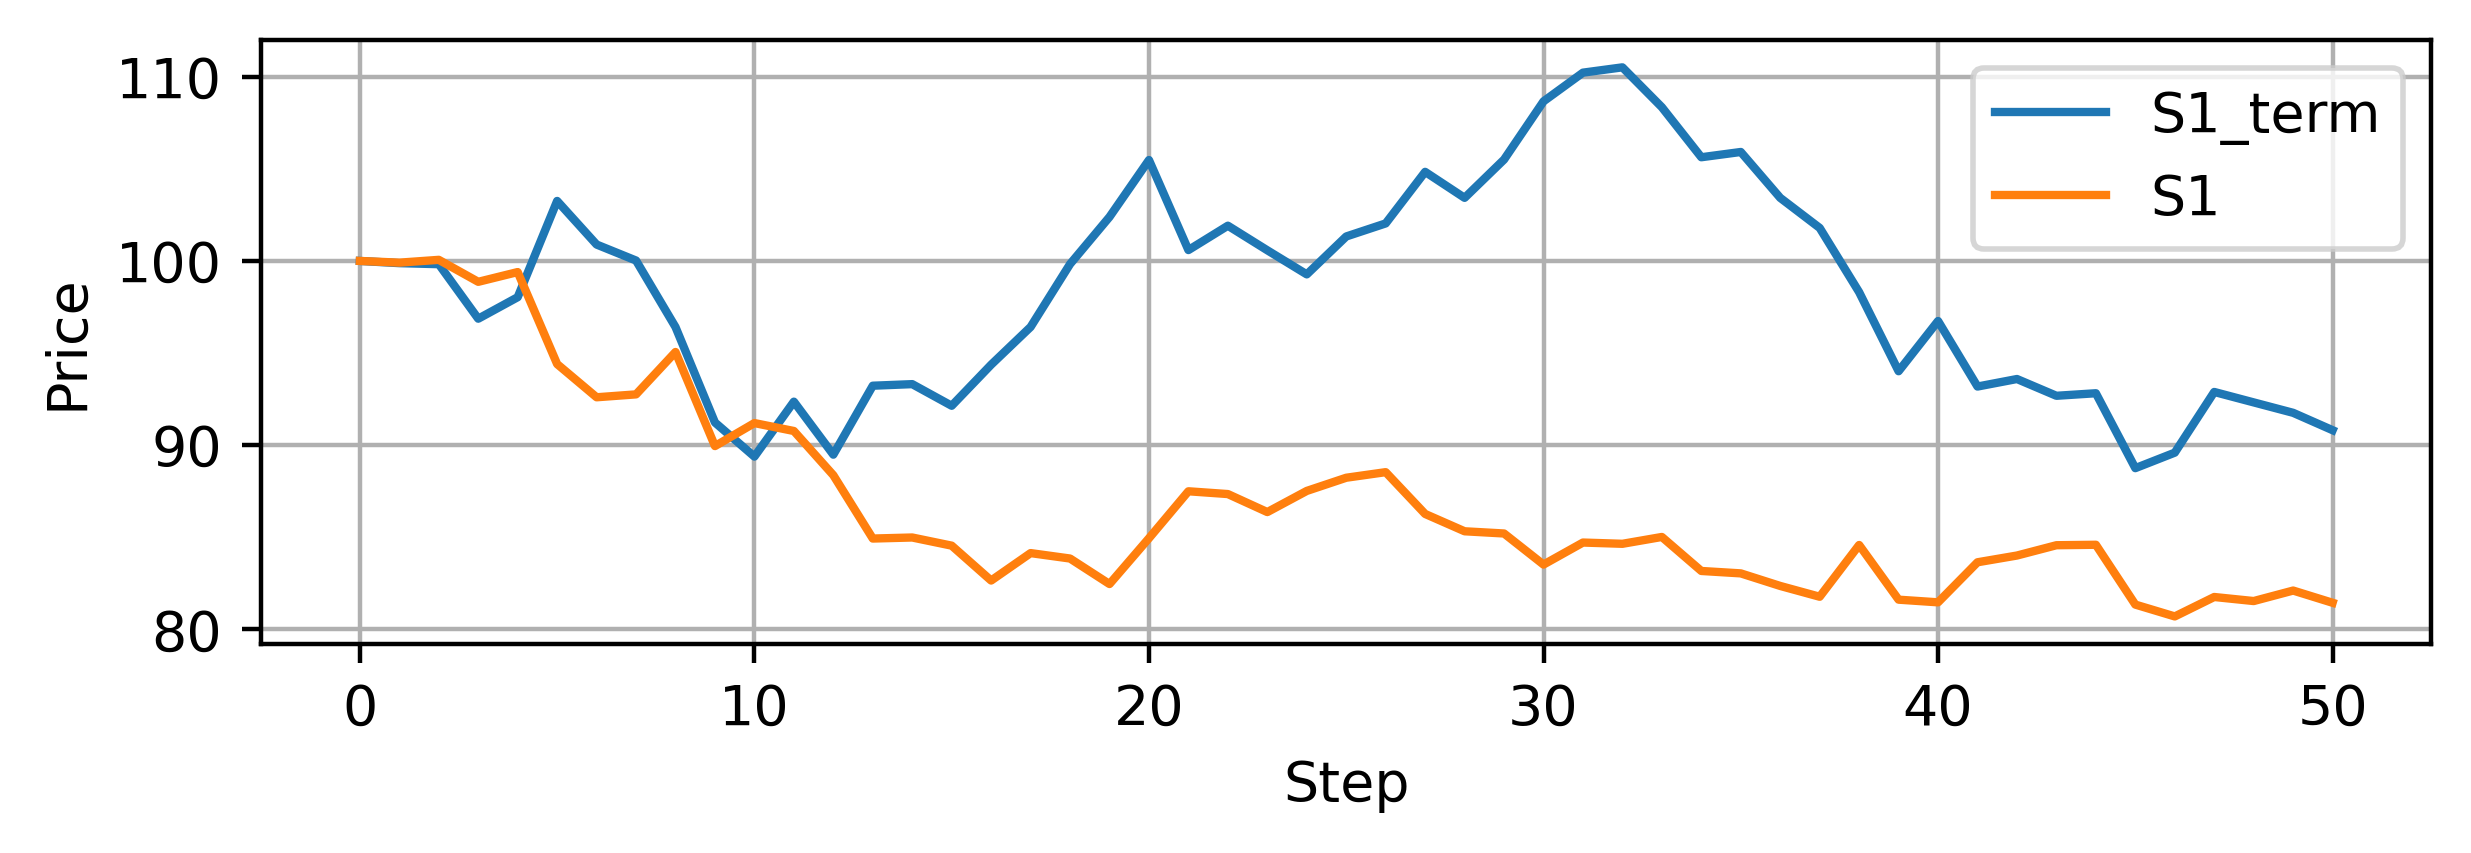

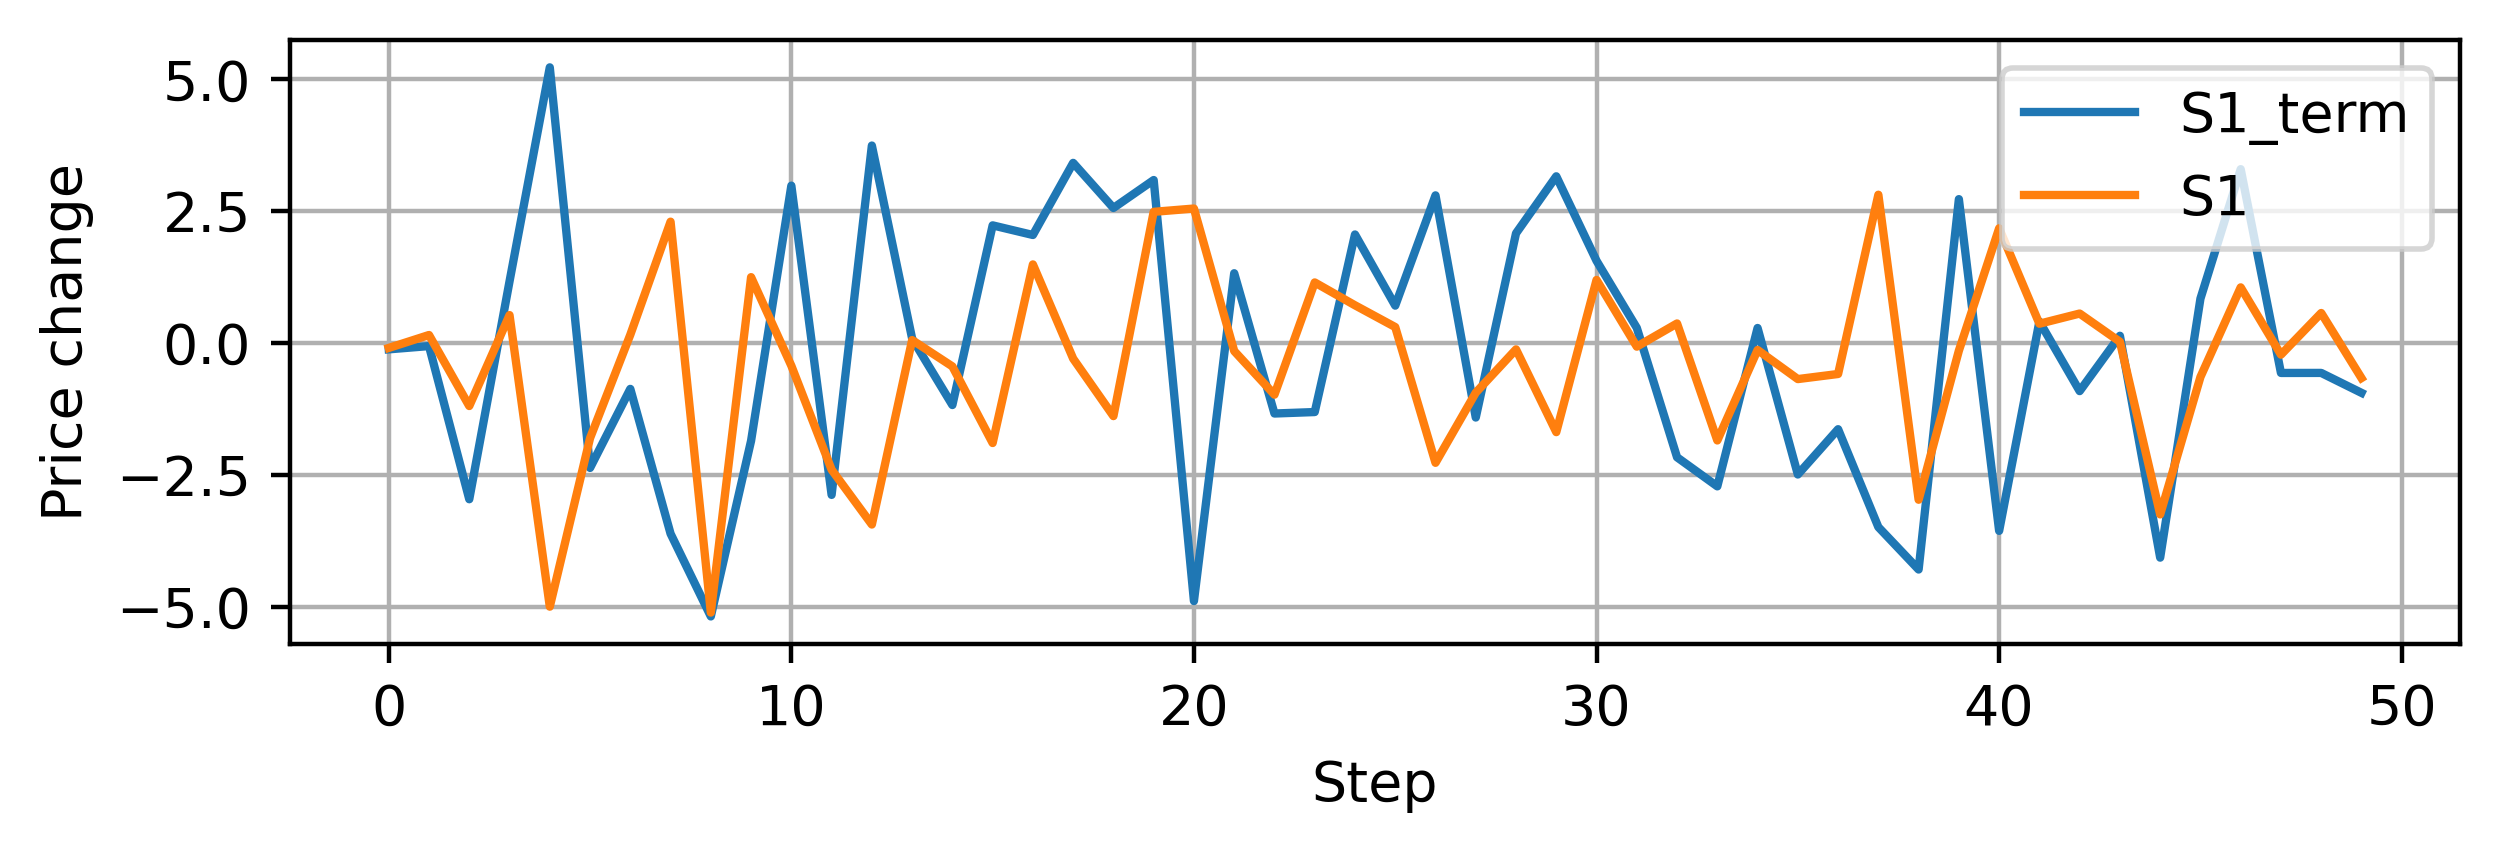

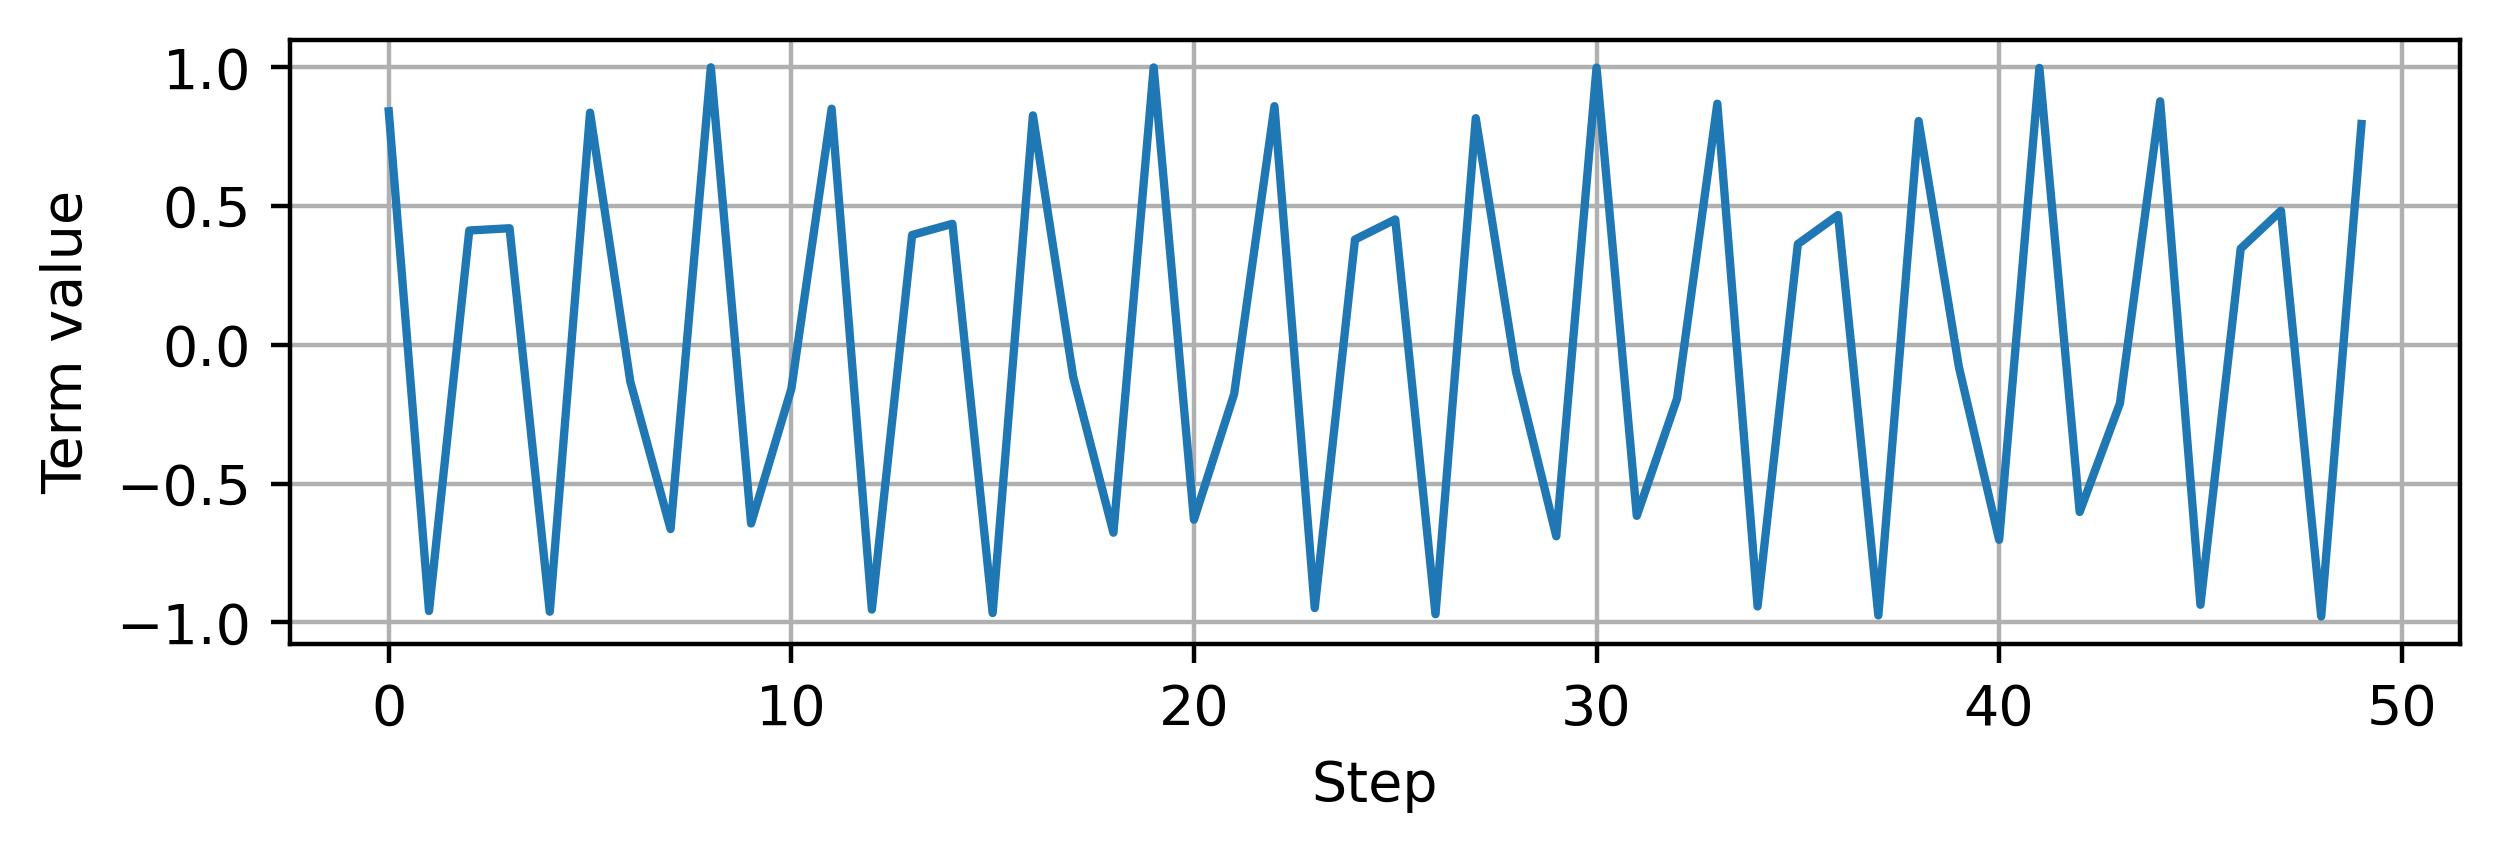

         0         1         2         3         4         5         6   \
0  0.841471 -0.958924  0.412118  0.420167 -0.961397  0.836656 -0.132352   
1  0.850904 -0.953753  0.395925  0.436165 -0.966118  0.826829 -0.114785   
2  0.860069 -0.948282  0.379608  0.452026 -0.970535  0.816743 -0.097182   
3  0.868966 -0.942514  0.363171  0.467745 -0.974649  0.806401 -0.079549   

         7         8         9         10  
0 -0.663634  0.999912 -0.643538 -0.158623  
1 -0.676772  0.999520 -0.629888 -0.176076  
2 -0.689698  0.998815 -0.616040 -0.193473  
3 -0.702408  0.997797 -0.602000 -0.210811  


In [7]:
dW1 = np.random.normal(scale=math.sqrt(T/N), size=N)
dW2 = np.random.normal(scale=math.sqrt(T/N), size=N)

S1 = Euler_trajectory (S_0, drift, vol1, vol2_1, vol2_2,(1,1,0,0), sigma1, r, T, N, 
            dw1=dW1, dw2=dW2, rho=1)
S1_term = Euler_trajectory (S_0, drift, vol1_term, vol2_1, vol2_2,(1,1,0,0), sigma1, r, T, N, 
                 dw1=dW1, dw2=dW2, rho=1)

plt.figure(figsize=(7, 2), dpi=400)
plt.plot(S1)
plt.plot(S1_term)
plt.legend({'S1','S1_term'})
plt.xlabel('Step')
plt.ylabel("Price")
plt.grid(10)
plt.show()

plt.figure(figsize=(7, 2), dpi=400)
plt.plot(np.diff(S1))#/S1[1:])
plt.plot(np.diff(S1_term))#/S1_term[1:])
plt.legend({'S1','S1_term'})
plt.xlabel('Step')
plt.ylabel("Price change")
plt.grid(10)
plt.show()

plt.figure(figsize=(7, 2), dpi=400)
plt.plot(np.sin(1+4*np.arange(50)))
plt.xlabel('Step')
plt.ylabel("Term value")
plt.grid(10)
plt.show()

print(pd.DataFrame(np.sin(1+4*np.arange(44)).reshape(4,11)))

The original model includes a sinusoidal term that multiplies the Brownian motion (BM) by a value that ranges from 1 to -1. More specifically, said term follows a deterministic pattern that repeats itself almost identically every 11 steps and only takes a value approximately equal to 1 on the 9th step of each cycle, with other steps featuring wildily different numbers.
The result of removing such term can be seen by comparing the 2 price change series: the new series displays changes that are almost identical to the ones observed in the original one when the sinusoidal term approaches 1 and changes of similar intensity but differt sign when the sinusoidal term approaches -1, with the other steps sitting between thise 2 extremes; as previously pointed out this pattern is deterministic and thus shows (little to) no difference between its cycles, as can be seen from the last graph and by looking at the table at the bottom of the above output.

Please do note that the 2nd graph also display the changes caused by the risk-free interest rate, which is always positive in our case <br>(i.e.: if <font size="3"><em>W<sub>j,1</sub> = 0 </em></font> then <font size="3"><em>dS<sub>j+1,1</sub> > 0 </em></font> provided that <font size="3"><em>dS<sub>j,1</sub> =/= 0 </em></font>).


<h2 align="center">Monte Carlo simulations for the call option price</h2>

When used to value an option, Monte Carlo simulation uses the risk-neutral
valuation result. We sample paths to obtain the expected payoff in a risk-neutral world and then discount this payoff at the risk-free rate. Consider a derivative dependent on a single market variable S that provides a payoff at time T. Assuming that interest rates are constant, we can value the derivative as follows:
1. Sample a random path for Sin a risk-neutral world.
2. Calculate the payoff from the derivative.
3. Repeat steps 1 and 2 to get many sample values of the payoff from the derivative in a risk-neutral world.
4. Calculate the mean of the sample payoffs to get an estimate of the expected payoff in a risk-neutral world.
5. Discount this expected payoff at the risk-free rate to get an estimate of the value of the derivative

In [8]:
Nt = np.round(np.arange(100,1001,100))
Mt = np.round(np.arange(10,101,10))
data = [[np.ndarray.flatten(np.append(MC_price_call (Euler, S_0, drift, vol1_term, vol2_1, vol2_2,[1,1,0,0,1,0,1,1], [sigma1,sigma2], r, T, N, M,
            dw1=None, dw2=None, rho=rho, alpha=alpha), [[N,M]],axis=0)) for N in Nt] for M in Mt]

N_M_an = [pd.DataFrame(np.transpose(np.array(data[i]))) for i in np.arange(0,len(data))]
N_M_an = pd.concat(N_M_an, axis=1)
c = []
list(c.extend(u) for u in [["M="+str(int(m))]*len(Nt) for m in list(N_M_an.iloc[5].unique())])
N_M_an.columns = [c,["N="+str(int(n)) for n in list(N_M_an.iloc[4])]]
N_M_an = N_M_an.drop([4,5])
N_M_an.index = "Mean,Variance,CI_l,CI_h".split(",")

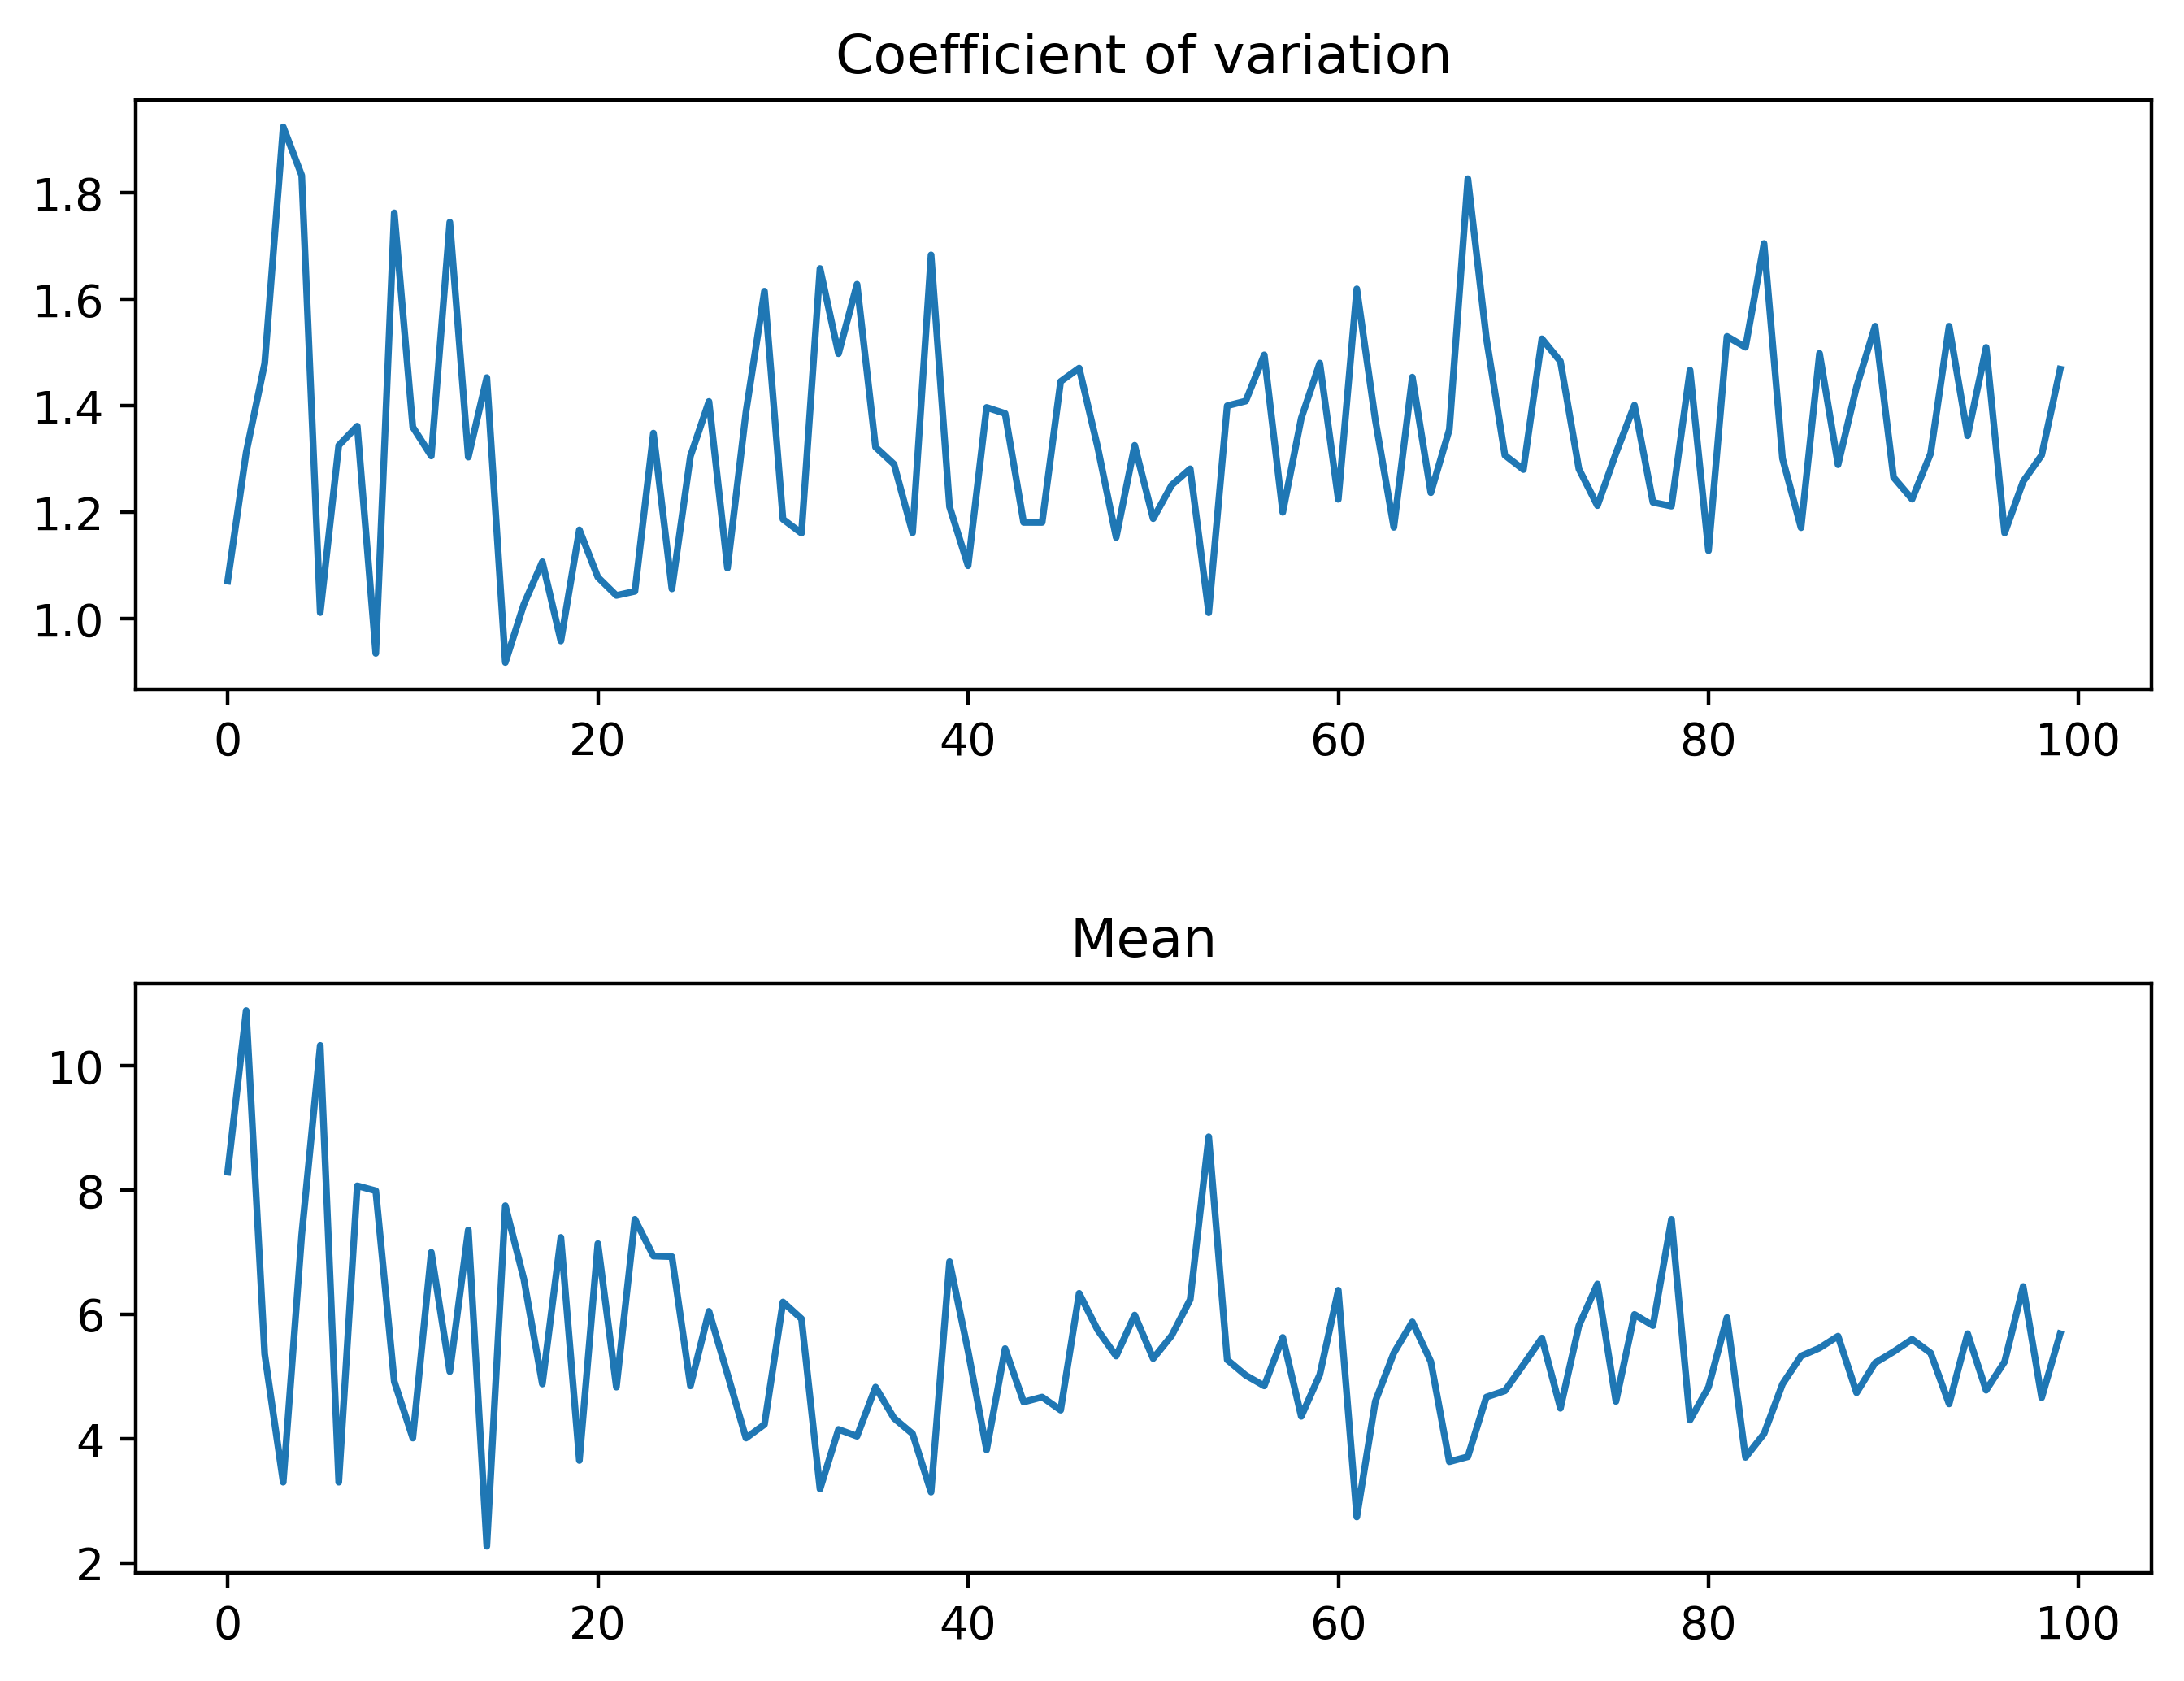

In [9]:
fig, ax=plt.subplots(2, figsize=(8,6), dpi=400)

ax[0].plot(np.array(N_M_an.loc["Variance",:]**(0.5)/np.array(N_M_an.loc["Mean",:])))
ax[1].plot(np.array(N_M_an.loc["Mean",:]))
ax[0].title.set_text('Coefficient of variation')
ax[1].title.set_text('Mean')
plt.subplots_adjust(hspace=0.5)

plt.show()

There does not seem to be any meaningful gain to be obtained by going for values of M larger than 50 and while the graph does not provide cut clear answers when it comes to choosing a value for N, we feel like setting the latter to 500 could be a sensible choice. 

<h2 align="center">Sensitivity analyses (rho and alpha)</h2>

In [10]:
N=500
M=50
dW1 = np.random.normal(scale=math.sqrt(T/N), size=(N, 1, M))
dW2 = np.random.normal(scale=math.sqrt(T/N), size=(N, 1, M))

In [11]:
rhot = np.round(np.arange(-1,1.01,0.05),3)
alphat = np.round(np.arange(0,1.01,0.05),3)
data = [[np.ndarray.flatten(np.append(MC_price_call (Euler, S_0, drift, vol1_term, vol2_1, vol2_2,[1,1,0,0,1,0,1,1], [sigma1,sigma2], r, T, N, M,
            dw1=dW1, dw2=dW2, rho=rho, alpha=alpha),[[alpha,rho]],axis=0)) for alpha in alphat] for rho in rhot]
alpha_rho_an = [pd.DataFrame(np.transpose(np.array(data[i]))) 
                for i in np.arange(0,len(rhot))]
alpha_rho_an = pd.concat(alpha_rho_an, axis=1)
c = []
list(c.extend(u) for u in [["Rho="+str(rh)]*len(alphat) for rh in 
                           list(alpha_rho_an.iloc[5].unique())])
alpha_rho_an.columns = [c,["Alpha="+str(al) for al in list(alpha_rho_an.iloc[4])]]
alpha_rho_an = alpha_rho_an.drop([4,5])
alpha_rho_an.index = "Mean,Variance,CI_l,CI_h".split(",")

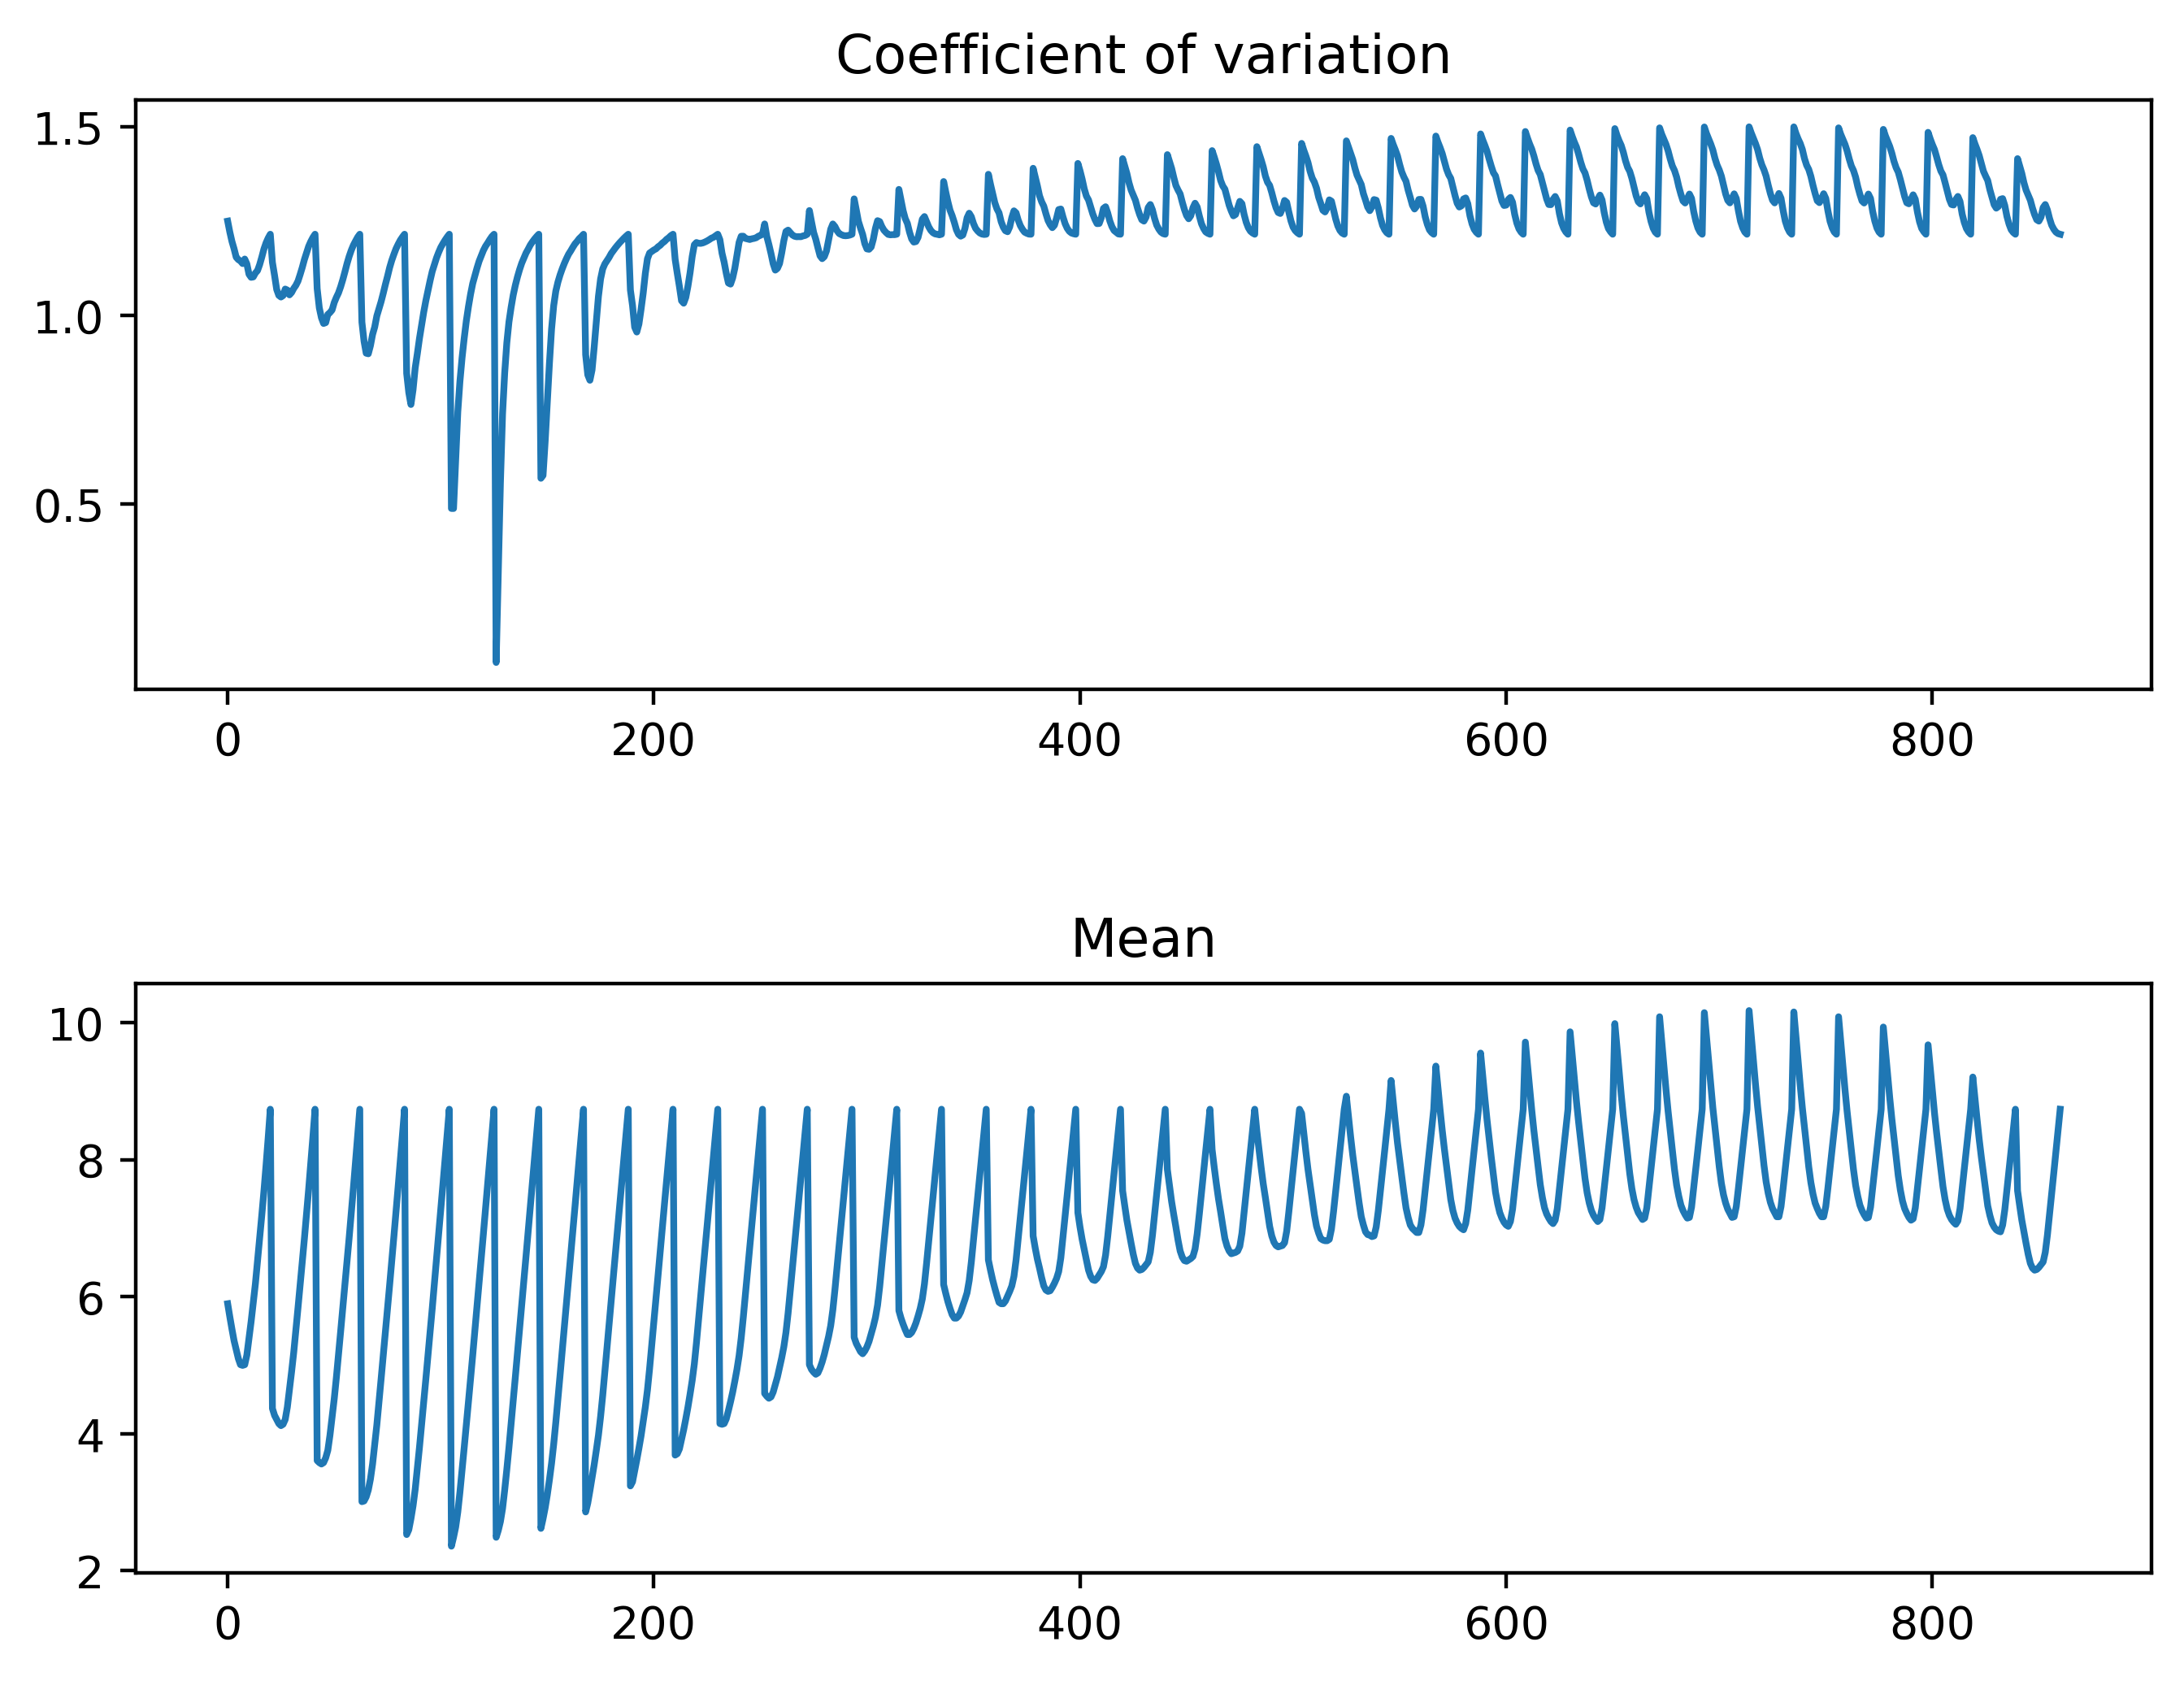

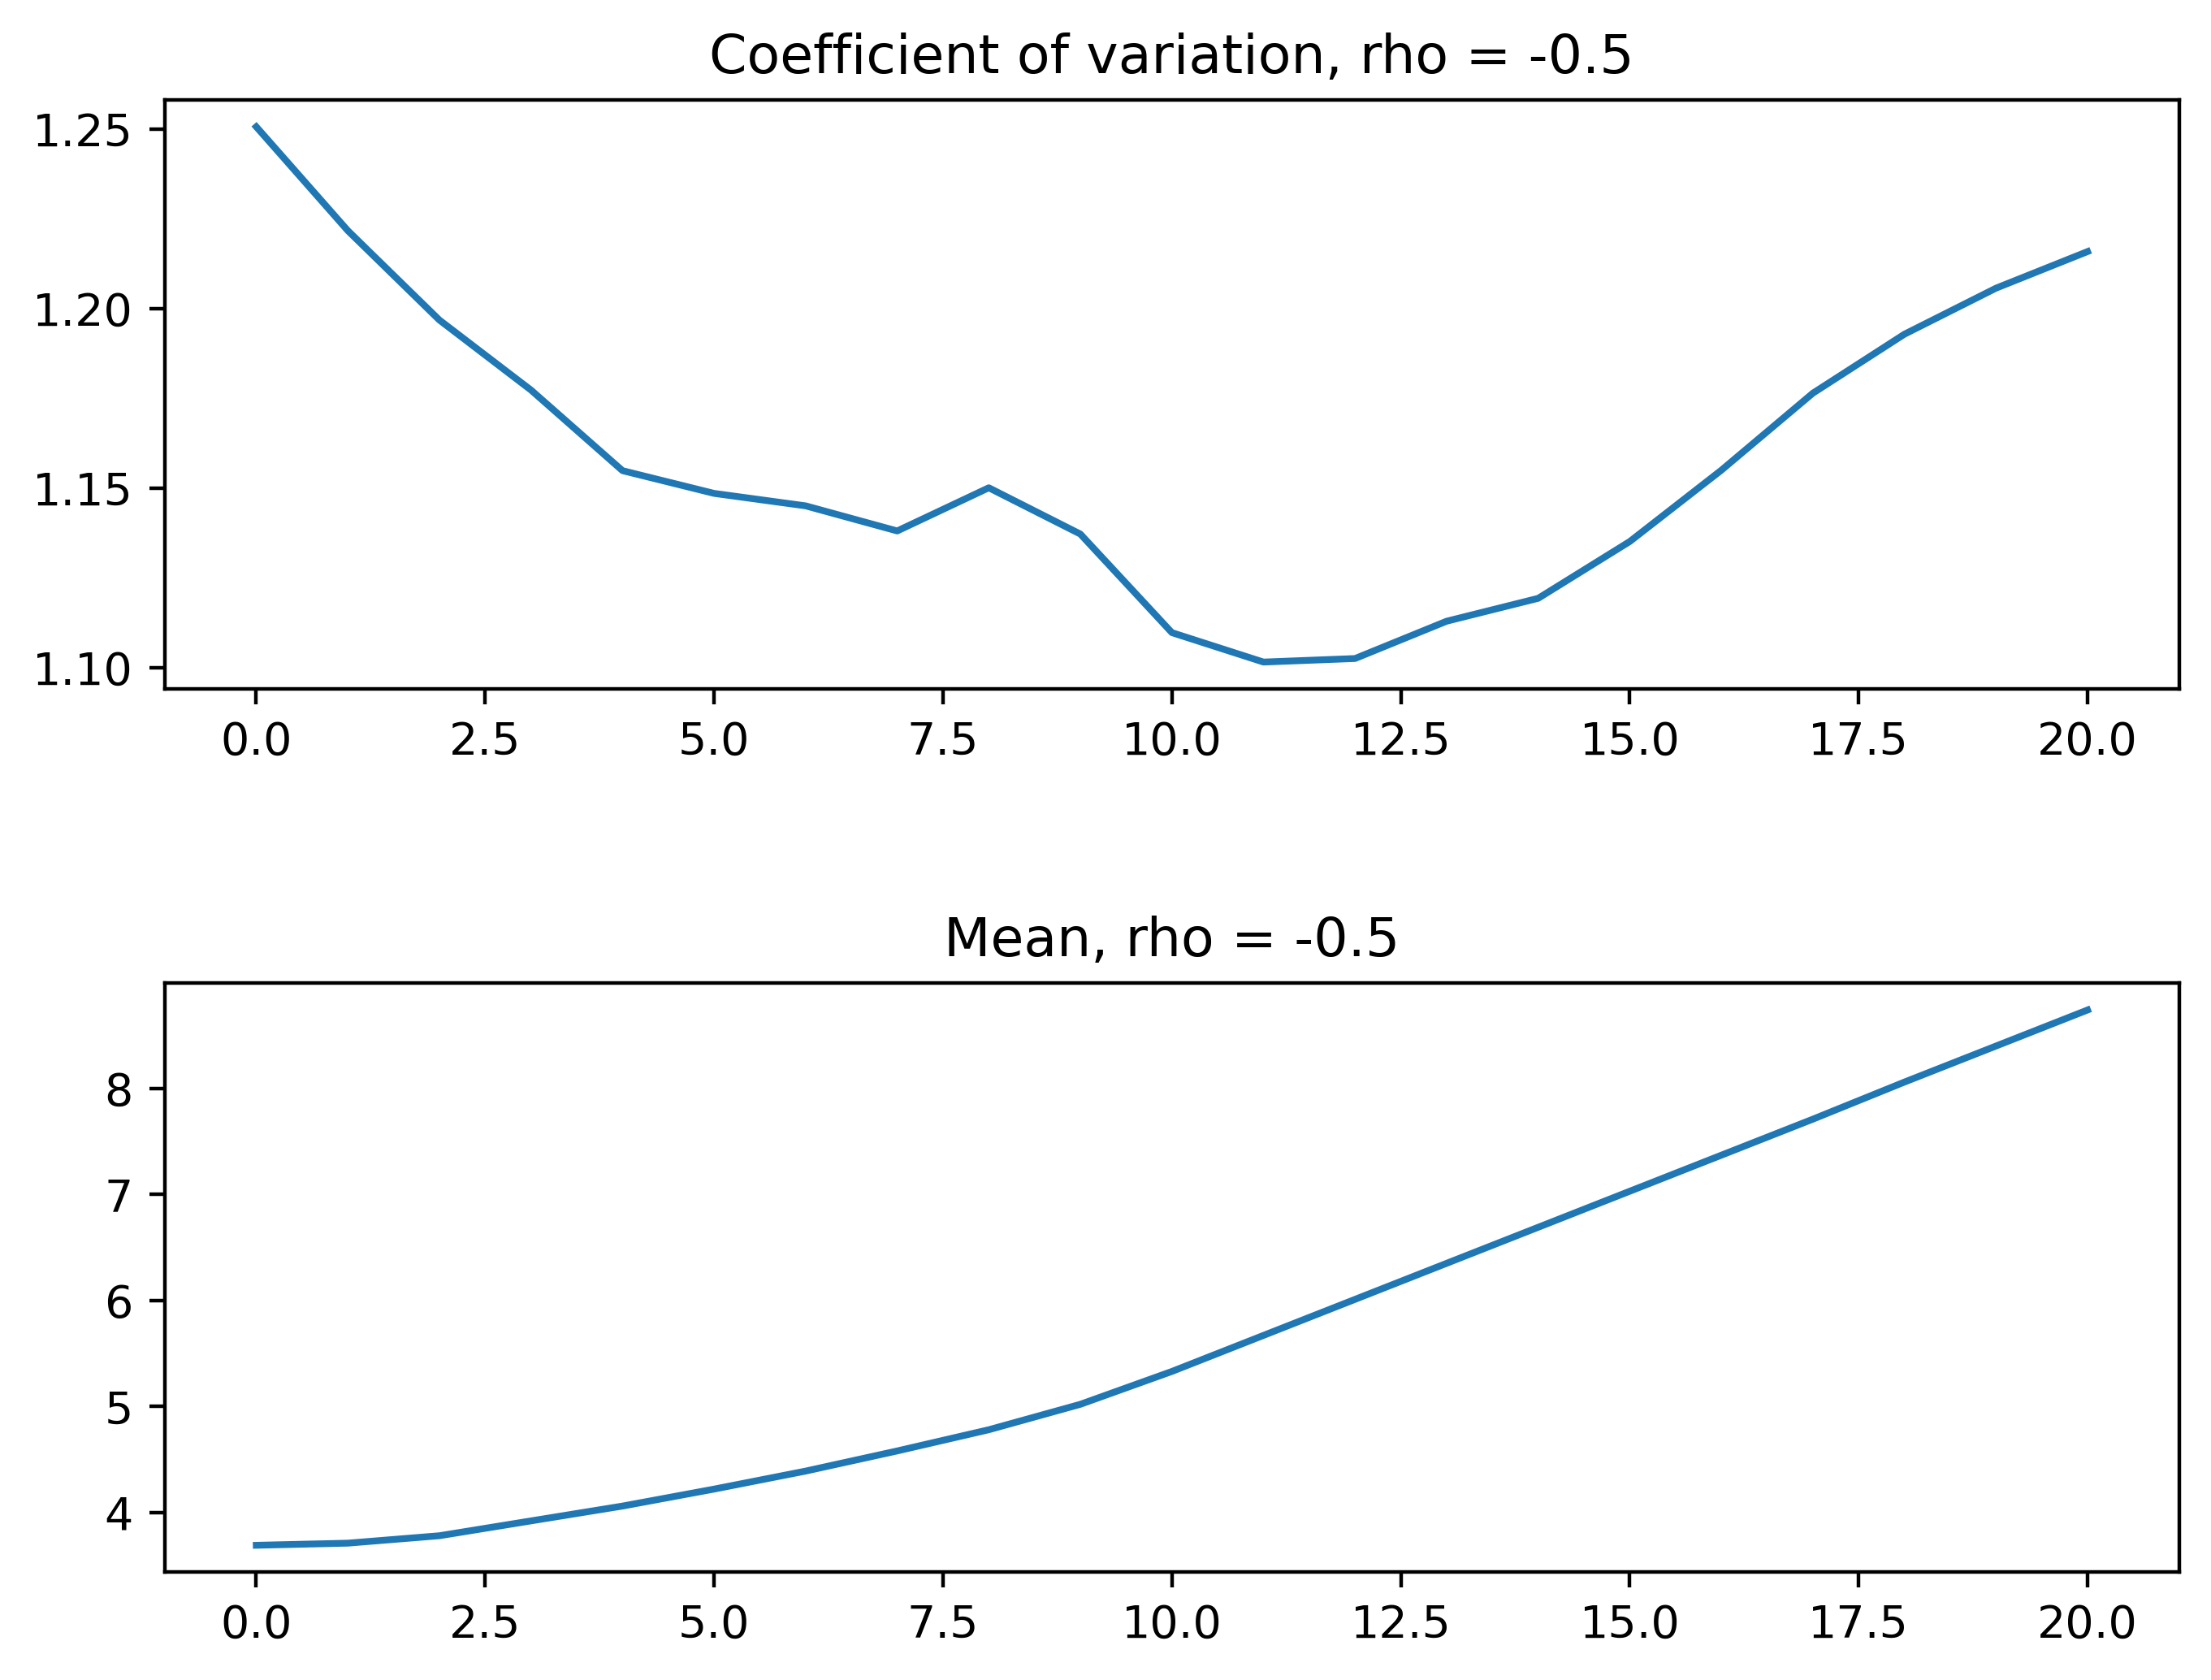

In [12]:
fig, ax=plt.subplots(2, figsize=(8,6), dpi=400)

ax[0].plot(np.array(alpha_rho_an.loc["Variance",:]**(0.5)/np.array(alpha_rho_an.loc["Mean",:])))
ax[1].plot(np.array(alpha_rho_an.loc["Mean",:].iloc[0:861]))
ax[0].title.set_text('Coefficient of variation')
ax[1].title.set_text('Mean')
plt.subplots_adjust(hspace=0.5)

plt.show()

fig, ax=plt.subplots(2, figsize=(8,6), dpi=400)

ax[0].plot(np.array(alpha_rho_an.loc["Variance",:].iloc[0:21]**(0.5)/np.array(alpha_rho_an.loc["Mean",:].iloc[0:21])))
ax[1].plot(np.array(alpha_rho_an.loc["Mean",:].iloc[210:231]))
ax[0].title.set_text('Coefficient of variation, rho = -0.5')
ax[1].title.set_text('Mean, rho = -0.5')
plt.subplots_adjust(hspace=0.5)

plt.show()

Given that the payoff of this option is <font size="3"><em>(α*S<sub>T,1</sub> +(1−α)*S<sub>T,2</sub>)−K)<sup>+</sup></em></font>, α=0 would imply that the option depends only on the second stock price while if α=1, it would depend only on the first stock price. Since in the standard parameters we are taking σ1 > σ2, that is the ﬁrst stock has higher volatility than the second, the payoﬀ of the option when the underlying is just the ﬁrst stock is lower than when the underlying is just the second stock. This implies that the price of said option will be higher when the underlying is just stock 2 rather just stock 1. Obviously, when considering just the first stock as the underlying, the correlation does not eﬀect the option price. 